# Новый набор данных

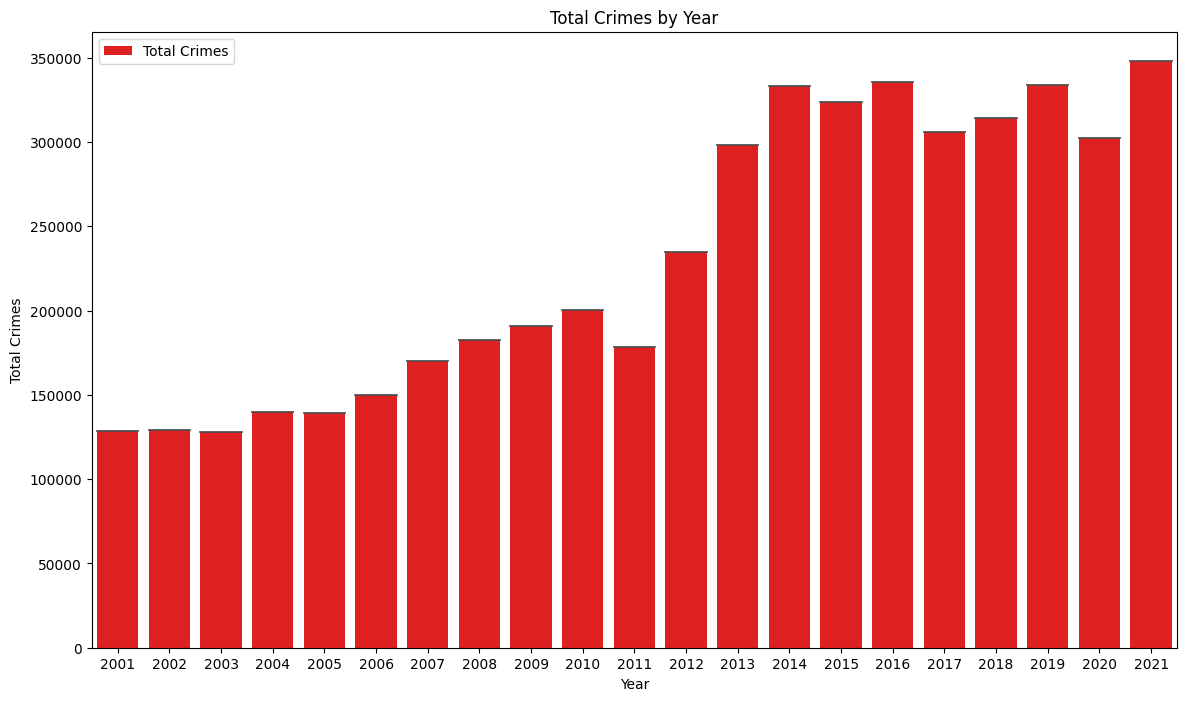

In [148]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/CrimesOnWomenData.csv")
df.shape

crimes = ["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"]

df_crimes = df.groupby('Year')[crimes].sum()
df_crimes['Total'] = df_crimes.sum(axis=1)

plt.figure(figsize=(12, 8))
sns.barplot(x=df_crimes.index, y=df_crimes['Total'], color='red')

По диаграмме видно, что количество преступлений возрастало с 2001 до 2014 года(кроме 2011), после чего 
последовала стагнация до
2021 года, в который совершилось больше всего преступлений в сравнении с предыдущими годами

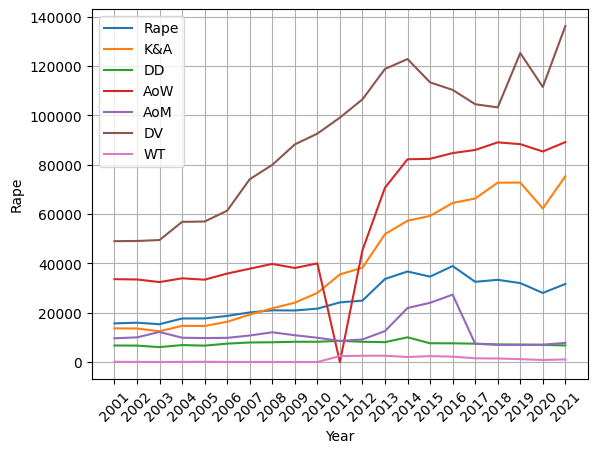

In [107]:
df_cr = df.groupby('Year')[crimes].sum() #не работает со старым df, хз почему
for crime in crimes:
    sns.lineplot(data=df_cr, x=df_cr.index, y=crime, label=crime)
plt.xticks(ticks=df_cr.index, rotation=45)
plt.grid(True)


Заметно, что после 2012 года резко возрастает половина параметров. 
Торговля женщинами, видимо, началась заноситься в статистику с 2010 года.
Почему 
Странно, что в 2011 году кол-во покушений на женщин снизилось до 0. Ошибка в данных? Но с этим можно связать небольной "провал" в количестве преступлений 2011 года, а точнее то, что этого провала не было, просто данные неполные

In [113]:
df_cr.groupby('Year')["AoW"].head()

Year
2001    33622
2002    33497
2003    32450
2004    33966
2005    33413
2006    35899
2007    37866
2008    39802
2009    38159
2010    40012
2011        0
2012    45344
2013    70739
2014    82235
2015    82422
2016    84746
2017    86001
2018    89097
2019    88367
2020    85392
2021    89200
Name: AoW, dtype: int64

Действительно 0, странная фигня

<Axes: xlabel='State', ylabel='Total'>

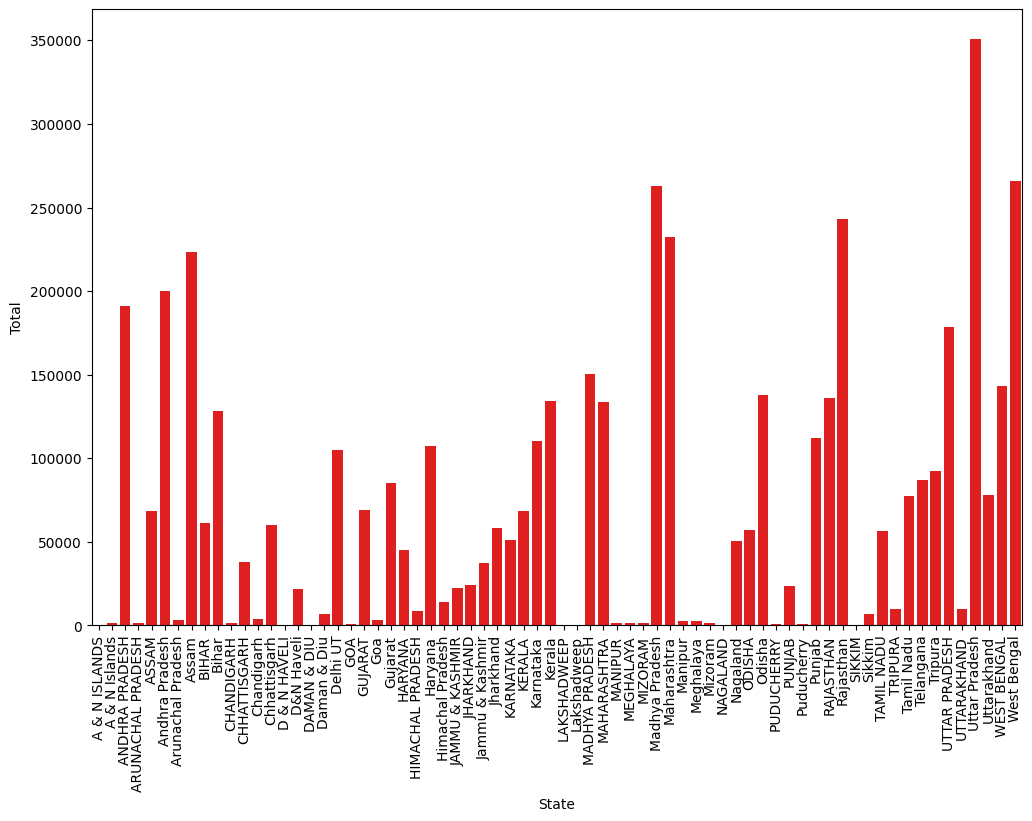

In [66]:
df_area = df.groupby('State')[crimes].sum()
df_area.head()

df_area['Total'] = df_area.sum(axis=1)
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x=df_area.index, y=df_area['Total'], color='red')

Звание наиболее неблагополучного района с огромным отставанием занимает - Uttar Pradesh

([<matplotlib.patches.Wedge at 0x79e01c7480b0>,
 [Text(-0.0036606113058693093, -1.0999939090398945, 'Rape'),
  Text(0.8487428517776288, -0.6997396455513852, 'K&A'),
  Text(1.0987280719649, -0.05288311522871901, 'DD'),
  Text(0.7628532667529426, 0.7924991441032374, 'AoW'),
  Text(-0.1554586113689761, 1.088959420800991, 'AoM'),
  Text(-1.099194854293732, 0.042079357102761665, 'DV'),
  Text(-0.39030024394571533, -1.028428762518783, 'WT')],
 [Text(-0.001996697075928714, -0.5999966776581241, '11.0%'),
  Text(0.46295064642416106, -0.3816761703007555, '17.2%'),
  Text(0.5993062210717636, -0.028845335579301273, '3.3%'),
  Text(0.41610178186524144, 0.43227226041994765, '23.9%'),
  Text(-0.08479560620125967, 0.5939778658914495, '5.0%'),
  Text(-0.5995608296147628, 0.02295237660150636, '39.2%'),
  Text(-0.21289104215220833, -0.5609611431920634, '0.4%')])

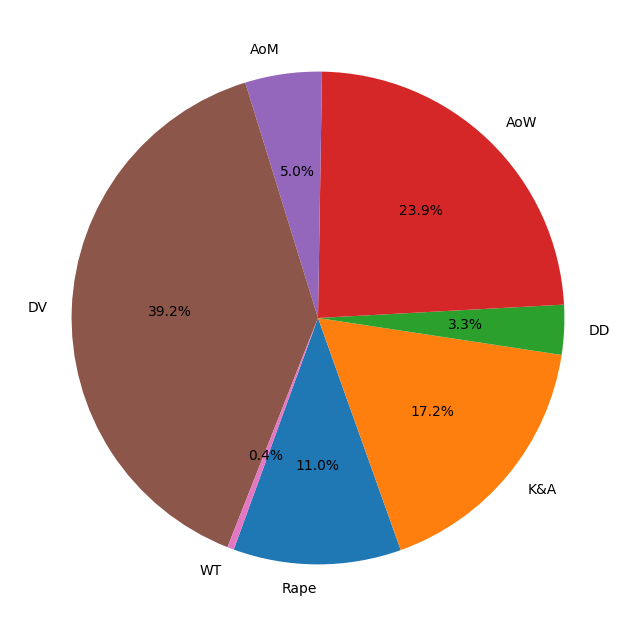

In [90]:
total_crimes = df[crimes].sum()
plt.figure(figsize=(10, 8))
plt.pie(total_crimes, labels=total_crimes.index, autopct='%1.1f%%', startangle=250)

(я не знаю, что это за вывод сверху)
Ожидаемо, что домашнее насилие будет на 1 месте, а вот меня удивило - 3.3 процента - смерть из-за приданного,
то есть когда жениху мало заплатили - он бьет жену, мда

Из интересного тут больше ничего и нет, но нужно сделать вид, что я знаю что-то супер умное(скопированное из статьи)

In [116]:
df_crimes.head()

,Rape,K&A,DD,AoW,AoM,DV,WT
Year,,,,,,,
2001,15694,13681,6738,33622,9656,49032,114
2002,15970,13613,6687,33497,10027,49102,76
2003,15357,12499,6078,32450,12220,49492,46
2004,17682,14697,6900,33966,9871,56867,89
2005,17701,14644,6673,33413,9759,56995,148


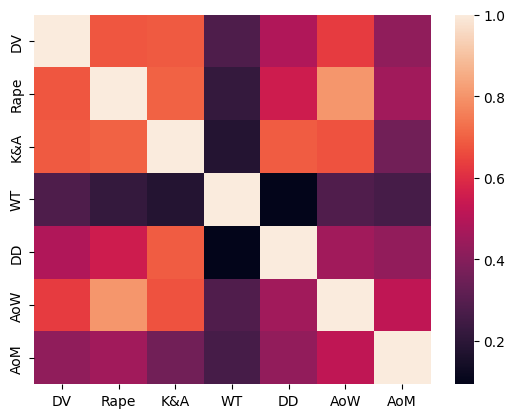

In [155]:
numerical = list(
    set(df.columns)
    - set(
        [
            "Year",
            "State",
            "Unnamed: 0"
        ]
    )
)

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);


Я вообще хз, что это значит

Попробую найти связи среди разных типов преступлений

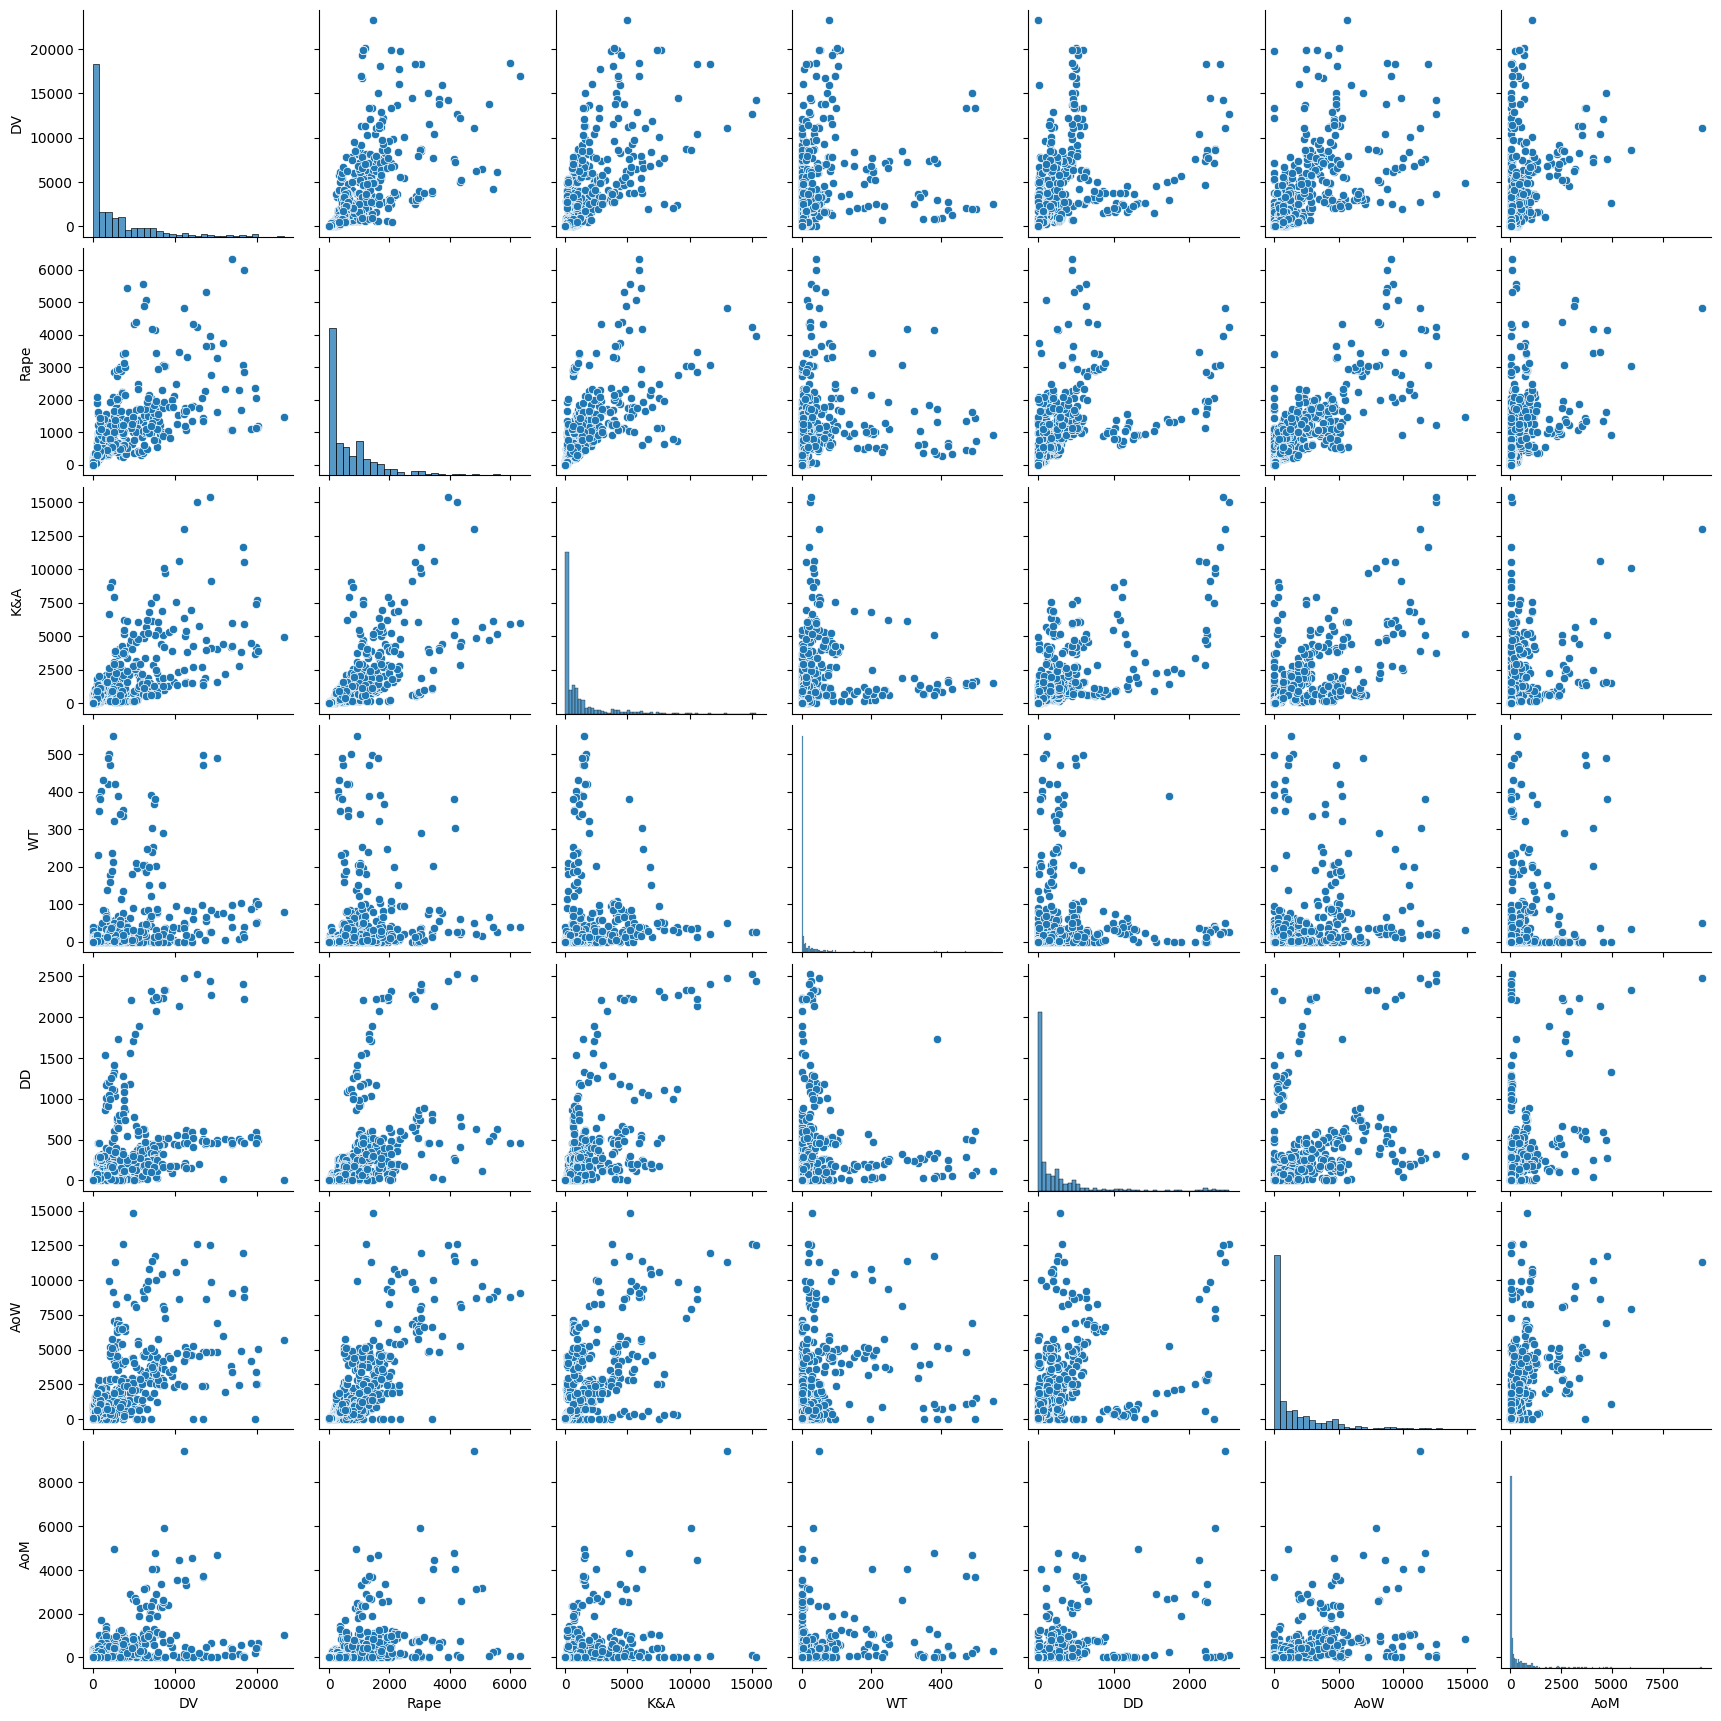

In [156]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [ ]:
Вывод - вряд-ли можно вывести какую-нибудь красивую теорию
Да,есть красивые зависимости, например в убийстве из-за приданного он логарифмически идет вниз, 
но это скорее всего из-за большого разрыва в количестве, а не из-за мистической связи